In [2]:
!pip install pandas

  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [5]:
data = df.to_numpy()
data[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [6]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, perch_weight, test_size=0.2, random_state=42
)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# 모델 파라미터 확인
print(lr.coef_, lr.intercept_)

[11.09529474 59.94662741 43.76845098] -612.9678799271909


In [10]:
lr.score(test_input, test_target)

0.8931658636745737

In [11]:
# 특성공학, 특성 갯수 늘리기 
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [13]:
print(train_poly.shape, test_poly.shape)

(44, 9) (12, 9)


In [14]:
train_poly[:5]

array([[ 28.    ,   7.82  ,   4.2   , 784.    , 218.96  , 117.6   ,
         61.1524,  32.844 ,  17.64  ],
       [ 27.3   ,   8.32  ,   5.14  , 745.29  , 227.136 , 140.322 ,
         69.2224,  42.7648,  26.4196],
       [ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416],
       [ 22.    ,   5.88  ,   3.52  , 484.    , 129.36  ,  77.44  ,
         34.5744,  20.6976,  12.3904],
       [ 18.7   ,   5.2   ,   3.12  , 349.69  ,  97.24  ,  58.344 ,
         27.04  ,  16.224 ,   9.7344]])

In [15]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련 세트", lr.score(train_poly, train_target))
print("테스트 세트", lr.score(test_poly, test_target))

훈련 세트 0.9900974417605037
테스트 세트 0.9766805886149259


In [17]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
print(train_poly.shape, test_poly.shape)

(44, 55) (12, 55)


In [19]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련세트:", lr.score(train_poly, train_target))

훈련세트: 0.9999999999815445


In [ ]:
print("테스트 세트:", lr.score(test_poly, test_target)) # 과대학습 상태(overfitting)

테스트 세트: -167.28747054534503


In [21]:
# 규제 - 정규화가 필수 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [22]:
# L2 규제 - 릿지
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_scaled, train_target)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
print("훈련세트:", ridge.score(train_scaled, train_target))
print("테스트 세트:", ridge.score(test_scaled, test_target))

훈련세트: 0.9896004835191297
테스트 세트: 0.978920058325179


In [27]:
ridge.coef_

array([18.67063237,  7.64991377,  8.60406366, 17.45557699, 13.70928725,
       12.63824698, 10.93289228,  9.97752237, 12.19994896, 13.19556333,
       12.60089127,  9.37153496, 12.14931553,  8.9289005 ,  8.59522862,
       11.66234165,  8.61885894,  8.71901445, 11.8323683 ,  7.55702547,
        9.01673958,  3.50396522, 10.28810252,  4.68679386,  1.78609125,
       11.23685969,  5.69249387,  3.08804574,  3.41559866, 11.75742364,
        6.41620142,  4.25025555,  5.23619634,  9.23682265,  1.51437944,
        4.55894943, -3.24146808,  7.26990356, -0.72490517, -6.16473128,
        9.5241888 ,  1.46583351, -3.82031836, -6.2759665 , 11.21806535,
        3.23201934, -1.76188044, -3.70366234, -2.62633422, 12.27010825,
        4.49594574, -0.06543893, -1.35966932,  0.55754384,  5.52651915])

In [24]:
# L1 규제 - 라쏘(Lasso)
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [25]:
print("훈련세트:",  lasso.score(train_scaled, train_target))
print("테스트 세트:", lasso.score(test_scaled, test_target))

훈련세트: 0.9897812228260618
테스트 세트: 0.9800354016844836


In [26]:
print(lasso.coef_)

[ 0.          0.          0.         93.55374204  4.24441276  0.
  4.69789692  0.         36.20443762  0.68140064 27.55470561  0.
 27.76546065  0.          0.         17.93932403  0.          0.
 42.58642369  0.          0.          0.          0.          0.
  0.          6.53437382  0.          0.          0.         22.5348658
  0.          0.          0.          5.21830137  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         31.65962367  0.          0.          0.
  0.         24.8732492   0.          0.          0.          0.
  0.        ]


In [30]:
55 - np.sum(lasso.coef_ == 0)

np.int64(14)

In [ ]:
# 규제 강도 (alpha) : 하이퍼파라미터, 10의 단위로 설정, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000

In [32]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


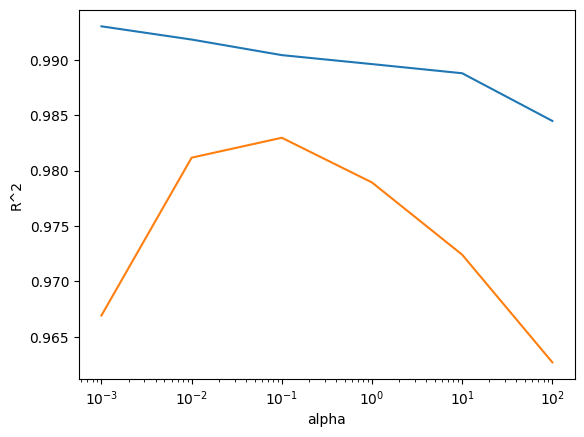

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.xscale('log') #log10
plt.show()

In [36]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("훈련세트:", ridge.score(train_scaled, train_target))
print("테스트세트:", ridge.score(test_scaled, test_target))

훈련세트: 0.9904101980758971
테스트세트: 0.9829550564532462
